#### <center><font color ='blue'> MULTIPLE LINEAR REGRESSION </font>

* Multiple linear regression is closely related to simple linear regression,model with difference in the number of independent variables.
* Multiple linear regression the values of dependent variables predict based on more than one independent variables.

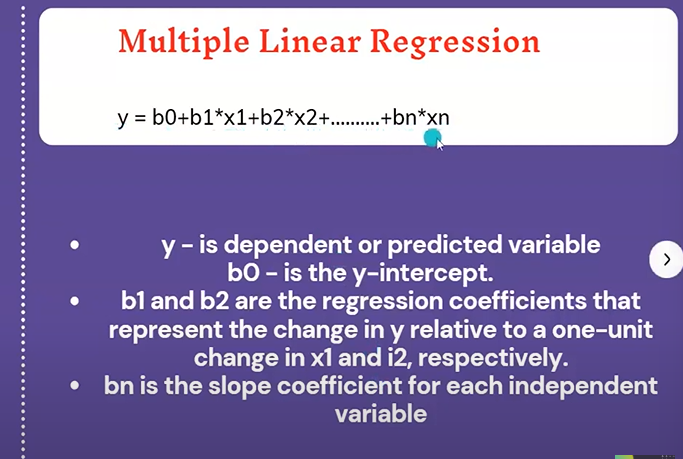

In [3]:
from PIL import Image
Image.open('mlr-1.png')

* how to find b0,b1 and b2 values .
* whenever we train the model using training data the value of MSE(mean squre erorr) is low 
  


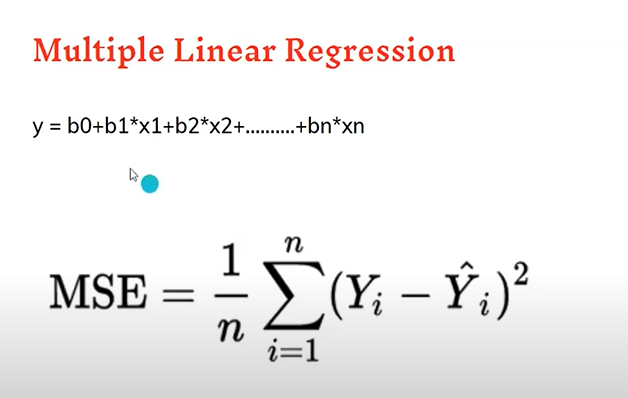

In [5]:
Image.open("mse.png")

* MSE means cost function
* cost function means a mathematical function that helps to measure how well the machine learning model is performing.
* it calculates the difference between the actual output(y_actual) and the predict the output(y_predict)


 <font color='red'> WHY IS COST FUNCTION IMPORTANT?</font>
* the goal of any machine learning model is to minimize the cost function to make the predict as accurate as possible.
 
  <font color='red'>how it works</font>
* step1 - cal the difference between actual and predict values
* step2 - square the difference
* step3 - sum all squared errors
* step4 - divide by the total number of data points.

<font color='red'> Gradient Descent</font>
* Gradient descent is an optimization algorithm used to find the minimum value of the cost function by adjusting the model's parameters(weights or coffficients).
* find the best-fit line in mutliple linear regression by iteratively u[dating the parameters to reduce the error.

< font color='red'> how its works</font>

* step1- initialize the paramerters: start with random values for b0,b1,b2,...,bn.
  
  






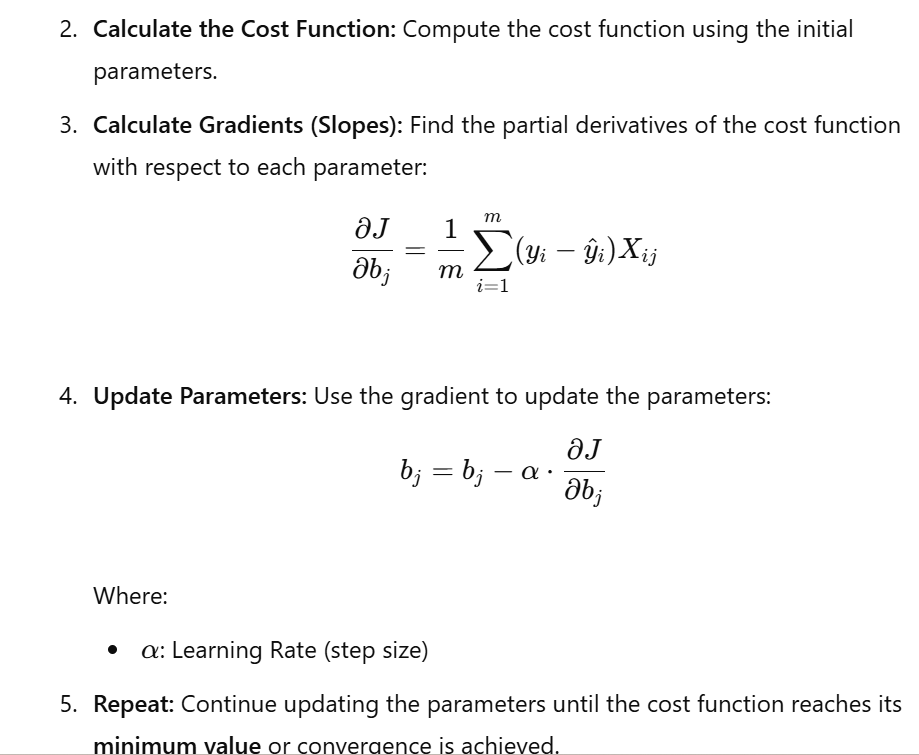

In [19]:
Image.open('gd.png')

<font color='red'>Where we apply</font>

* linearity : The relationship between dependent and independent variables should be linear.
* lack of multicollinearity : multicollinearity occurs when the features(independent variables) are not independent of each other.
* Multivariate Normality : Multiple regression assumes that the residuals are normally distributed.

<font color='BLUE'> DUMMY VARIABLE</FONT>

* A dummy variable is a binary(0 or 1) variable that represents categories in a .
dataset.
* it is used to convert caterogical data into numerical data so that machine learning algorithms can easily understand and process the data.
  

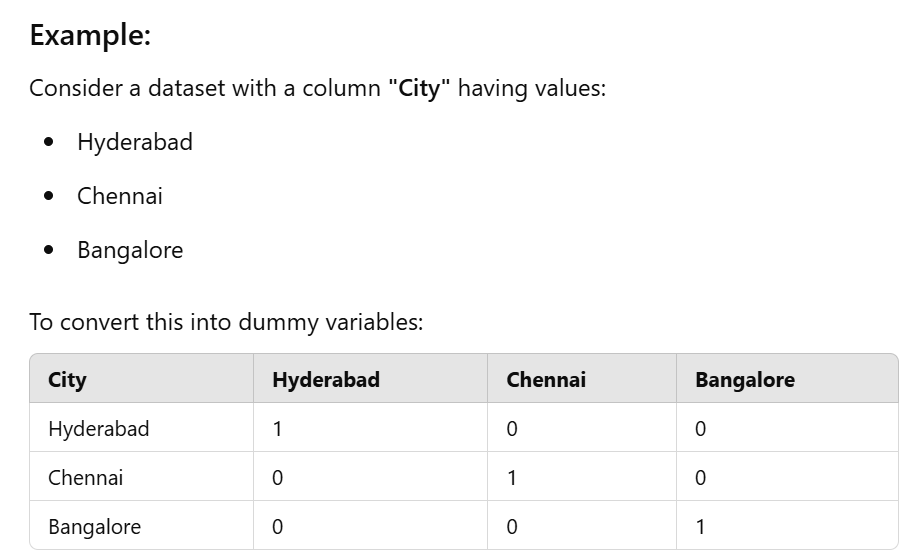

In [27]:
Image.open('dummy.png')

<font color='red'>Solving Dummy variable trap</font>

* more than two variables is know as dummy variable trap


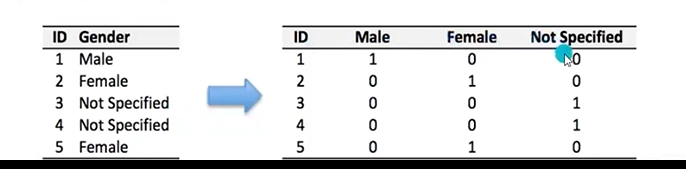

In [30]:
Image.open('dvt.png')

* example of dummy variable trap

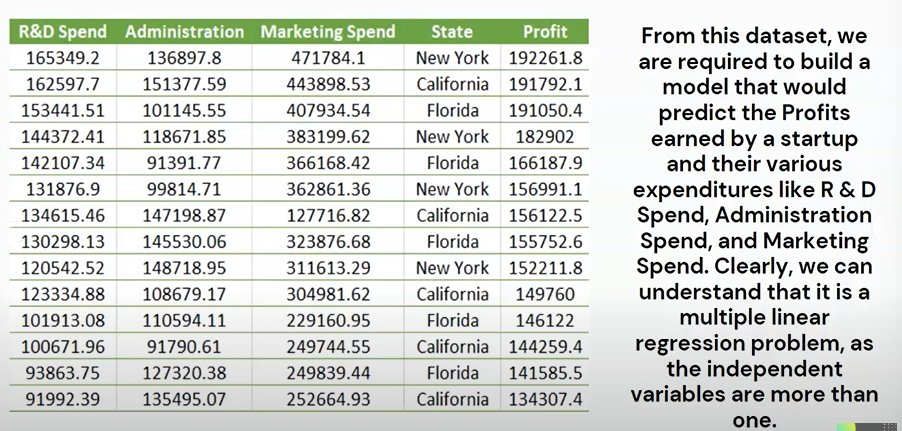

In [33]:
Image.open('dvt-ex.png')


* state coloumn convert to numaric by using encoder/label encoder/oneHot encoder
* then after state column showing like this
* here state column in presents (newyork,california,florida) it changes to numaric values 

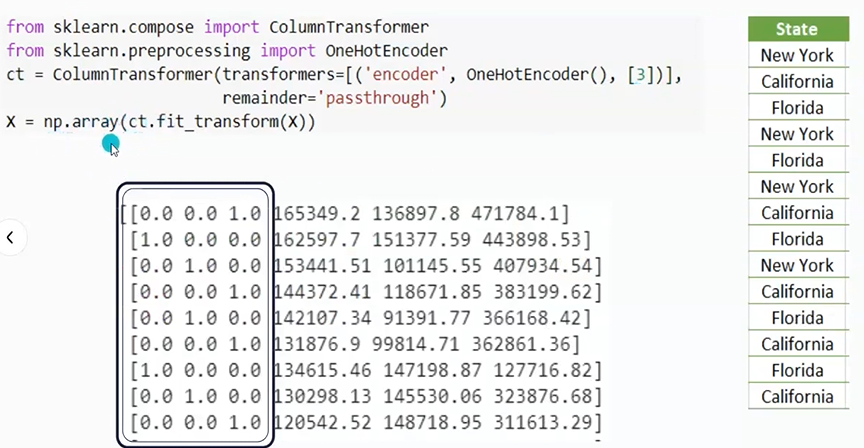

In [36]:
Image.open('dvt-ex1.png')

* how to slove the dummy variable trap?
* to avoiding the dummy variable,to remove one coloumn

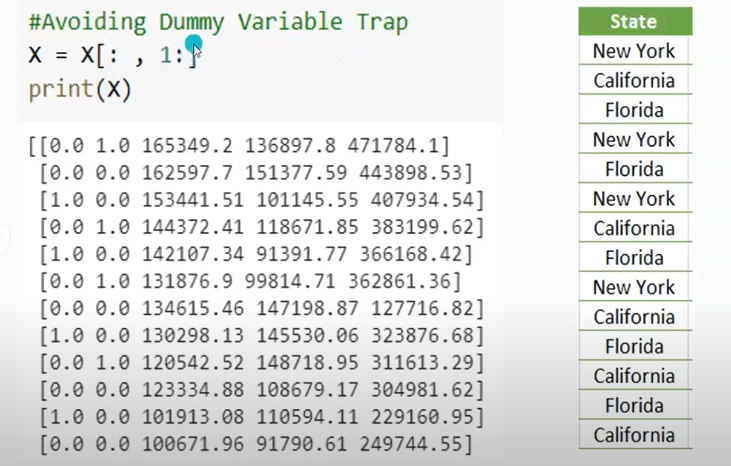

In [39]:
Image.open('dvt-ex2.png')

START THE DATA PREPROCESSING 
* Data preprocessing
* splitting data into training and test sets
* Feature scaling(optional)
* Training the Model
* prediction
* Evaluating the model
* visualizing Results


<font color='dark red'> predict the result</font>

* whenever you predicting the result once check the overfitting and under fitting methond also. 

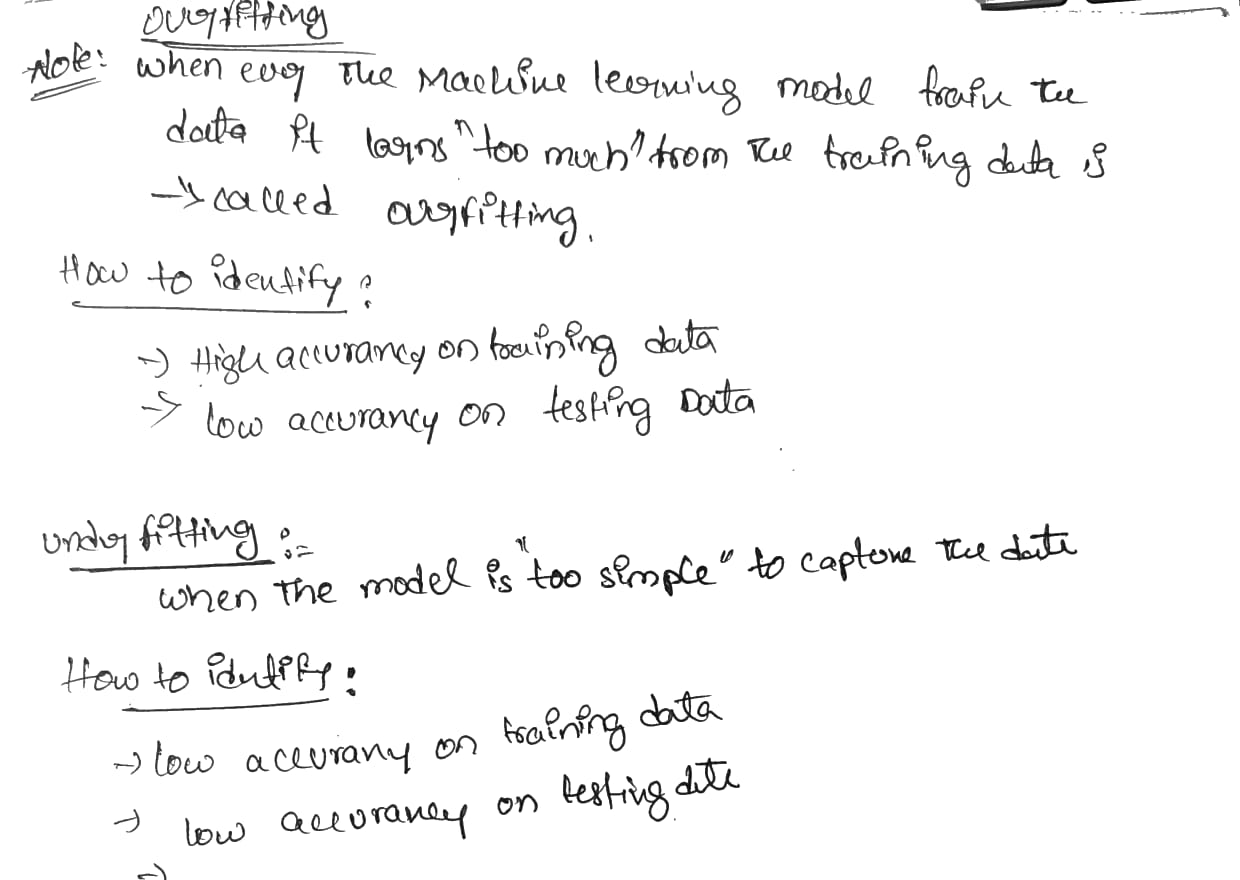

In [45]:
Image.open('of and uf.jpg')

* Mean squre error it is not a correct acurency based on train_test data.
* we go r2 score it gives actual acurency.
* r2=1-rss/tss

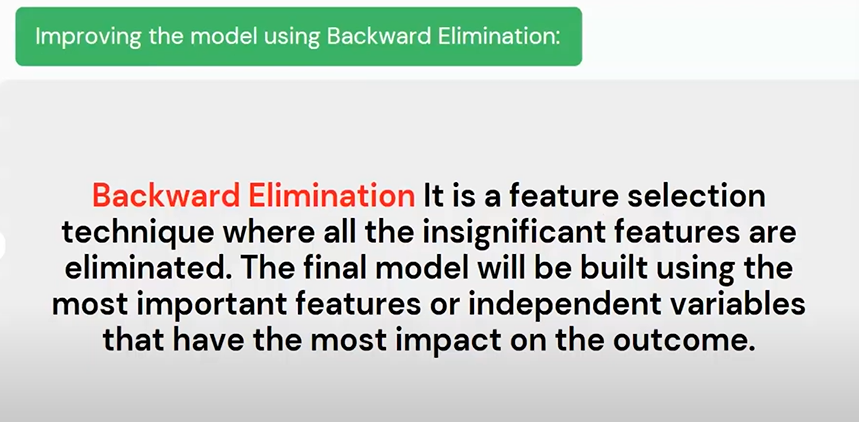

In [48]:
Image.open('imp.png')


* It is a step-by-step process where we start with all independent variables in the model and gradually remove the least significant features one by one based on their p-values.

<font color='blue'> Steps of Backward Elimination:
* step1-Fit the Model with All Features:
Start by including all independent variables in the regression model.

* step2- Calculate p-values:
Check the p-value for each independent variable using the OLS (Ordinary Least Squares) method.

* step3-Remove the Highest p-value Feature:
If the p-value of a variable is greater than the significance level (usually 0.05), remove that variable from the model.

* step4-Refit the Model:
After removing one feature, refit the model with the remaining features.

* step5-Repeat the Process:
Continue removing features one by one until all remaining features have p-values less than the significance level.



<font color='blue'> IMPLEMENTATION (MULTIPLE LINEAR REGRESSION)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("C:/Users/kamis/OneDrive/Desktop/ml-notes/50_Startups.csv")

In [14]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
df.isna().sum() #check the empty values 

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [20]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=ct.fit_transform(x)

In [38]:
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [40]:
#avoiding dummy variable
x=x[:,1:]

In [42]:
x

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
x_train

array([[1.0, 0.0, 55493.95, 103057.49, 214634.81],
       [0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [1.0, 0.0, 75328.87, 144135.98, 134050.07],
       [0.0, 0.0, 46426.07, 157693.92, 210797.67],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 1.0, 65605.48, 153032.06, 107138.38],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 61994.48, 115641.28, 91131.24],
       [0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 23640.93, 96189.63, 148001.11],
       [0.0, 0.0, 76253.86, 113867.3, 298664.47],
       [0.0, 1.0, 15505.73, 127382.3, 35534.17],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 0.0, 64664.71, 139553.16, 137962.

In [50]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred=regression.predict(x_test)

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9347068473282446

In [22]:
import statsmodels.api as sm
x=np.random.rand(50,5)
y = 3*x[:, 0] + 2*x[:, 1] + np.random.rand(50)
x=np.append(arr=np.ones((50,1)).astype(int),values=x,axis=1)
x_opt=x[:,[0,1,2,3,4,5]]
regressor_OLS=sm.OLS(endog=y,exog=x_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     153.6
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           1.09e-26
Time:                        17:19:18   Log-Likelihood:                 1.0252
No. Observations:                  50   AIC:                             9.950
Df Residuals:                      44   BIC:                             21.42
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7974      0.169      4.718      0.0

In [26]:
x_opt=x[:,[1,3,4,5]]
regressor_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              191.2
Date:                Mon, 31 Mar 2025   Prob (F-statistic):                    4.95e-28
Time:                        17:21:33   Log-Likelihood:                         -60.427
No. Observations:                  50   AIC:                                      128.9
Df Residuals:                      46   BIC:                                      136.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.6441      0.354     10.295      0.000       2.932       4.357
x2            -0.3677      0.416     -0.883      0.382      -1.206       0.470
x3             1.3696      0.339      4.042      0.000       0.688       2.052
x4             1.1550      0.345      3.348      0.002       0.461       1.849
==============================================================================
Omnibus:                        1.037   Durbin-Watson:                   2.297
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                1.065
Skew:                           0.313   Prob(JB):                        0.587
Kurtosis:                       2.653   Cond. No.                         4.19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
x_opt=x[:,[3,4,5]]
regressor_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.801
Method:                 Least Squares   F-statistic:                              67.90
Date:                Mon, 31 Mar 2025   Prob (F-statistic):                    4.13e-17
Time:                        17:23:26   Log-Likelihood:                         -90.307
No. Observations:                  50   AIC:                                      186.6
Df Residuals:                      47   BIC:                                      192.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5474      0.731      0.749      0.458      -0.924       2.019
x2             2.4771      0.578      4.287      0.000       1.315       3.639
x3             2.4377      0.579      4.214      0.000       1.274       3.602
==============================================================================
Omnibus:                        0.067   Durbin-Watson:                   2.303
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.055
Skew:                          -0.051   Prob(JB):                        0.973
Kurtosis:                       2.873   Cond. No.                         3.66
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
x_opt=x[:,[1,2,4,5]]
regressor_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1560.
Date:                Mon, 31 Mar 2025   Prob (F-statistic):                    1.82e-48
Time:                        17:22:55   Log-Likelihood:                         -9.2293
No. Observations:                  50   AIC:                                      26.46
Df Residuals:                      46   BIC:                                      34.11
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.1795      0.126     25.195      0.000       2.925       3.433
x2             2.3667      0.133     17.794      0.000       2.099       2.634
x3             0.2583      0.128      2.022      0.049       0.001       0.516
x4             0.2199      0.122      1.795      0.079      -0.027       0.466
==============================================================================
Omnibus:                        2.581   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.414
Skew:                          -0.519   Prob(JB):                        0.299
Kurtosis:                       2.715   Cond. No.                         4.21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
x_opt=x[:,[1,2,5]]
regressor_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1950.
Date:                Mon, 31 Mar 2025   Prob (F-statistic):                    2.67e-49
Time:                        17:23:42   Log-Likelihood:                         -11.357
No. Observations:                  50   AIC:                                      28.71
Df Residuals:                      47   BIC:                                      34.45
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.2548      0.124     26.151      0.000       3.004       3.505
x2             2.4861      0.123     20.209      0.000       2.239       2.734
x3             0.2528      0.125      2.017      0.049       0.001       0.505
==============================================================================
Omnibus:                        4.539   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                3.959
Skew:                          -0.689   Prob(JB):                        0.138
Kurtosis:                       3.050   Cond. No.                         3.39
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""